In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('youtube_shorts_performance_dataset.csv')
df

,video_id,title,duration_sec,hashtags_count,views,likes,comments,shares,upload_hour,category
0,vid_1000,Short Video #0,43,9,198775,21933,3228,400,8,Tech
1,vid_1001,Short Video #1,56,2,290336,20063,3719,1942,16,Comedy
2,vid_1002,Short Video #2,33,6,264206,37032,3228,1817,7,Food
3,vid_1003,Short Video #3,19,9,85076,27269,2371,980,1,Lifestyle
4,vid_1004,Short Video #4,47,8,90780,8041,2891,1109,23,Tech
...,...,...,...,...,...,...,...,...,...,...
295,vid_1295,Short Video #295,15,3,248940,23810,488,1247,12,Tech
296,vid_1296,Short Video #296,32,4,366340,29586,46,1548,8,Travel
297,vid_1297,Short Video #297,29,3,434027,6471,3359,1069,21,Comedy
298,vid_1298,Short Video #298,54,4,318623,6459,4873,1690,14,Food


In [22]:
df.shape

(300, 10)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        300 non-null    object
 1   title           300 non-null    object
 2   duration_sec    300 non-null    int64 
 3   hashtags_count  300 non-null    int64 
 4   views           300 non-null    int64 
 5   likes           300 non-null    int64 
 6   comments        300 non-null    int64 
 7   shares          300 non-null    int64 
 8   upload_hour     300 non-null    int64 
 9   category        300 non-null    object
dtypes: int64(7), object(3)
memory usage: 23.6+ KB


In [24]:
df.describe()

,duration_sec,hashtags_count,views,likes,comments,shares,upload_hour
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,31.730000,4.343333,245058.166667,23063.126667,2638.296667,999.576667,11.543333
std,16.042912,2.956562,141338.982093,14597.458220,1416.827287,564.410105,6.814414
min,5.000000,0.000000,1404.000000,109.000000,40.000000,2.000000,0.000000
25%,18.000000,2.000000,129620.500000,10342.000000,1445.750000,516.250000,6.000000
50%,32.000000,4.000000,255962.000000,21779.500000,2863.500000,988.000000,12.000000
75%,45.000000,7.000000,356805.000000,36706.500000,3761.000000,1463.750000,17.000000
max,59.000000,9.000000,499401.000000,49923.000000,4971.000000,1998.000000,23.000000


In [25]:
df.groupby('category')['video_id'].count().sort_values(ascending=False)

category
Food         57
Tech         55
Education    53
Comedy       53
Lifestyle    42
Travel       40
Name: video_id, dtype: int64

In [26]:
df['video_id'].unique().size

300

In [27]:
df.groupby('category')['views'].sum().sort_values(ascending=False)

category
Comedy       14410062
Food         13382286
Tech         12296300
Education    11899202
Lifestyle    11654158
Travel        9875442
Name: views, dtype: int64

In [28]:
df.groupby('category')['views'].mean().sort_values(ascending=False)

category
Lifestyle    277479.952381
Comedy       271887.962264
Travel       246886.050000
Food         234776.947368
Education    224513.245283
Tech         223569.090909
Name: views, dtype: float64

In [29]:
df.groupby('category')['comments'].mean().sort_values(ascending=False)

category
Comedy       2904.283019
Education    2694.452830
Tech         2609.527273
Travel       2565.825000
Food         2536.000000
Lifestyle    2477.309524
Name: comments, dtype: float64

In [30]:
df.groupby('category')['shares'].mean()

category
Comedy       1134.207547
Education    1013.547170
Food          900.947368
Lifestyle     966.523810
Tech          992.836364
Travel        987.200000
Name: shares, dtype: float64

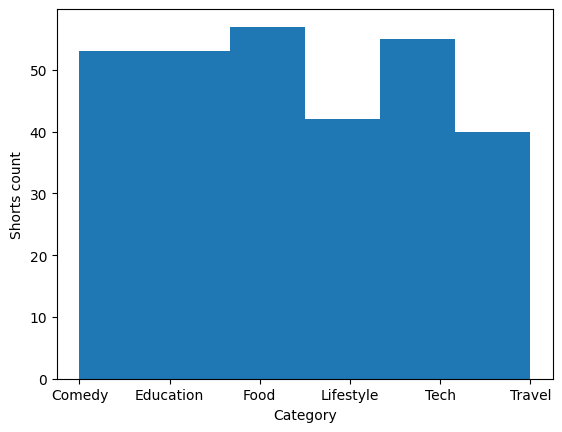

In [31]:
plt.hist(df['category'].sort_values(), bins=len(df['category'].unique()))
plt.xlabel("Category")
plt.ylabel("Shorts count")
plt.show()

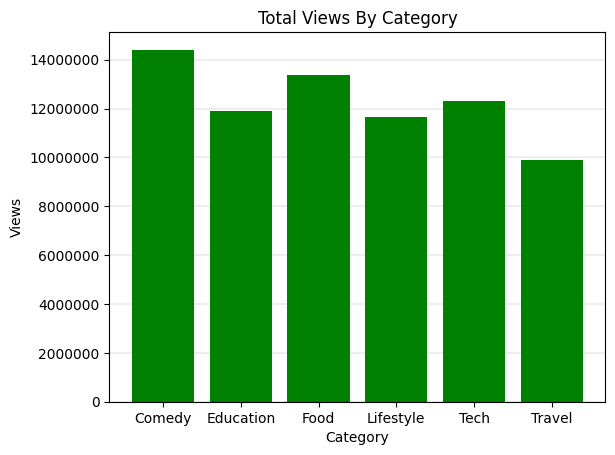

In [32]:
views_by_group = df.groupby('category')['views'].sum()
plt.bar(views_by_group.index, views_by_group.values, label = 'Views', zorder=2, color="green")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Category')
plt.ylabel('Views')
plt.grid(axis='y', linewidth=0.3)
plt.title("Total Views By Category")
plt.show()


In [33]:
top_ten_views = df[['video_id', 'views']].sort_values('views', ascending=False).head(10)
top_ten_views

,video_id,views
272,vid_1272,499401
150,vid_1150,498562
146,vid_1146,497484
85,vid_1085,493734
64,vid_1064,488462
102,vid_1102,487261
266,vid_1266,486450
46,vid_1046,486008
131,vid_1131,484685
256,vid_1256,482680


In [34]:
# Highest Engagement videos
df['engagement'] = df['comments'] + df['shares'] + df['likes']
df[['video_id', 'category', 'engagement']].sort_values(by = 'engagement', ascending=False).head(10)

,video_id,category,engagement
166,vid_1166,Education,54638
125,vid_1125,Tech,54129
29,vid_1029,Education,52858
101,vid_1101,Education,52804
158,vid_1158,Tech,52391
48,vid_1048,Lifestyle,52379
294,vid_1294,Education,52275
292,vid_1292,Tech,52087
92,vid_1092,Comedy,51539
78,vid_1078,Travel,51424


In [35]:
# Max engagement by category
df.groupby('category')['engagement'].max().sort_values(ascending=False)

category
Education    54638
Tech         54129
Lifestyle    52379
Comedy       51539
Travel       51424
Food         51006
Name: engagement, dtype: int64

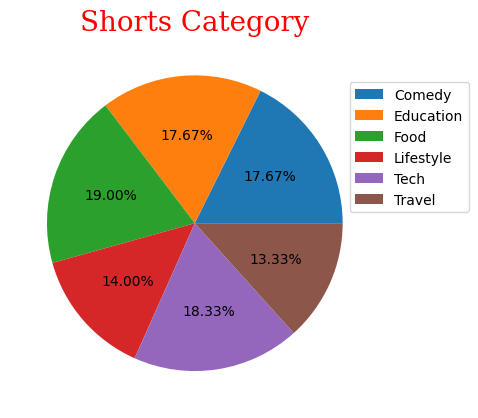

In [36]:
# Categorial views
videos_count_by_category = df.groupby('category')['video_id'].count()
plt.pie(videos_count_by_category.values, autopct="%1.2f%%")
plt.title("Shorts Category", fontdict={'family':'serif','color':'red','size':20})
plt.legend(labels=videos_count_by_category.index, bbox_to_anchor=(0.9, 0.9))
plt.show()